# Table of Contents
 <p><div class="lev2 toc-item"><a href="#过程逻辑" data-toc-modified-id="过程逻辑-01"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>过程逻辑</a></div>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy_indexed as npi


In [130]:
from itertools import combinations,permutations

In [4]:
t_a = np.array([['a','m','1'],['a','m','2'],['b','n','1'],['b','n','1'],['b','n','1'],['b','n','2'],['a1','o','1']])

In [5]:
t_a

array([['a', 'm', '1'],
       ['a', 'm', '2'],
       ['b', 'n', '1'],
       ['b', 'n', '1'],
       ['b', 'n', '1'],
       ['b', 'n', '2'],
       ['a1', 'o', '1']], 
      dtype='<U2')

In [35]:
def vdm(cols,clu):
    m_u = np.unique(cols,return_counts=True)
    vdm_value = np.zeros(len(list(combinations(m_u[0],2))))
    for k in np.unique(clu):
        m_ui = np.unique(cols[np.where(clu == k)],return_counts=True)
        m_ui0,m_ui1 = m_ui
        array_diff = np.setdiff1d(m_u[0],m_ui[0])
        print(array_diff)
        m_ui1 = np.append(m_ui1,[0]*len(array_diff))
        m_ui0 =  np.append(m_ui0,array_diff)
        print(m_ui0,m_ui1,)
        s_mui = sorted(zip(m_ui0,m_ui1),key=lambda x:x[0])
        s_mui1 = np.array([y for x,y in s_mui])
        clu_rate = zip(m_u[0],s_mui1/m_u[1])    
        clu_sq = [np.square(c[0][1]-c[1][1]) for c in combinations(clu_rate,2)]
        print(clu_sq)
        vdm_value += np.array(clu_sq)
        print(vdm_value)
    ret = dict(zip(combinations(m_u[0],2),vdm_value))
    return ret


In [42]:
vdm(t_a[:,1],t_a[2])

['m' 'o']
['n' 'm' 'o'] [1 0 0]
[0.0625, 0.0, 0.0625]
[ 0.0625  0.      0.0625]
['n' 'o']
['m' 'n' 'o'] [1 0 0]
[0.25, 0.25, 0.0]
[ 0.3125  0.25    0.0625]
['n' 'o']
['m' 'n' 'o'] [1 0 0]
[0.25, 0.25, 0.0]
[ 0.5625  0.5     0.0625]


{('m', 'n'): 0.5625, ('m', 'o'): 0.5, ('n', 'o'): 0.0625}

In [76]:
class Kmean:
    def __init__(self,k,iter_num):
        self.k = k
        self.iter_num = iter_num
    def get_init_vector(self,X):
        distance,max_cores = 0,''
        for i in combinations(X,self.k):
            npt = np.array(list(combinations(i,2)))
            ret = np.sqrt(np.square(npt[:,0] - npt[:,1]).sum(axis=1)).sum()
            if ret > distance:
                distance,max_cores = ret,i
        return np.array(max_cores)

    def train(self,X):
        init_vetor = avg_vector = self.get_init_vector(X)
        get_nearcore = lambda x:np.argmin(np.square(avg_vector - x).sum(axis=1))
        cnt = 0
        plt.figure(figsize=(16,9))
        while True:
            last_avg = avg_vector
            cnt += 1
            new_cluster = np.apply_along_axis(get_nearcore,axis=1,arr=X)
            clu_tag, avg_vector = npi.group_by(new_cluster).mean(data)
            plt.plot(avg_vector[:,0],avg_vector[:,1],'b^')
            print(np.square(avg_vector - last_avg).sum())
            if (np.square(avg_vector - last_avg).sum()< 0.01) or  (cnt >=self.iter_num):
                break
        c0 = data[new_cluster==0];c1 = data[new_cluster==1];c2 = data[new_cluster==2]
        plt.plot(c0[:,0],c0[:,1],'.r',c1[:,0],c1[:,1],'.g',c2[:,0],c2[:,1],'.y',init_vetor[:,0],init_vetor[:,1],'b*',avg_vector[:,0],avg_vector[:,1],'bo')
        return new_cluster

In [77]:
K = Kmean(3,10)


10.0280236213
0.0


array([1, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 1, 0, 1, 0, 2,
       2, 0, 0, 1, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 0, 2,
       0, 2, 1, 2, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 2, 2, 2, 0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 0, 2,
       1, 0, 0, 1, 1, 1, 2, 2])

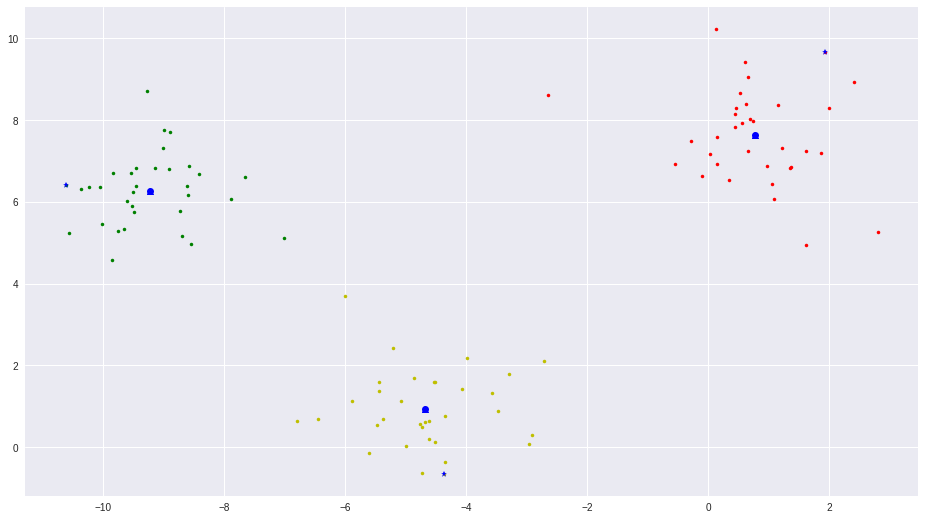

In [81]:
data,clu = make_blobs(n_samples=100,n_features=2,centers=3)
K.train(data)

In [629]:
combinations(data,3)

In [159]:
data2,clu = make_blobs(n_samples=3,n_features=2,centers=3)
data2

array([[ -2.8642465 ,  -2.28322115],
       [ 10.16543833,   6.78202416],
       [ -0.16619602,  -7.36516776]])

In [103]:
mdata = np.matrix(data2)

In [186]:
m = 10
n = 2
k = 3
D_mat = np.zeros((m,m))
data,clu = make_blobs(n_samples=m,n_features=n)

for x,y in combinations(range(m),2):
    D_mat[x,y] = D_mat[y,x] = np.sqrt(np.square(data[x] - data[y]).sum())

In [206]:
import random

In [282]:
clus = random.sample(range(k),k)


In [286]:
min_index = np.argmin(D_mat[:,clus][clus,:].sum(axis=1))

In [287]:
clus.pop

2

In [251]:
len(list(permutations(clus,2)))

6

In [268]:
clus

[1, 3, 0]

In [280]:
D_mat[:,clus][clus,:].sum(axis=1)

array([ 14.82685848,  27.73620952,  16.45227214])

In [263]:
np.array(list(permutations(clus,2)))

array([[1, 3],
       [1, 0],
       [3, 1],
       [3, 0],
       [0, 1],
       [0, 3]])

In [264]:
D_mat[np.array(list(permutations(clus,2)))].shape

(6, 2, 10)

In [208]:
clus    

[7, 5, 2]

In [187]:
pd.DataFrame(D_mat)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,1.771461,6.651315,14.680812,12.429730,1.175307,14.167183,0.724968,6.267658,5.693486
1,1.771461,0.000000,8.421028,13.055398,10.744294,0.664342,12.458932,1.072071,8.034642,7.453706
2,6.651315,8.421028,0.000000,20.903063,18.831136,7.794631,20.614212,7.354987,0.925326,1.458710
3,14.680812,13.055398,20.903063,0.000000,2.584487,13.526285,1.989261,13.967946,20.746499,20.241019
4,12.429730,10.744294,18.831136,2.584487,0.000000,11.259292,1.814128,11.707502,18.605923,18.072554
5,1.175307,0.664342,7.794631,13.526285,11.259292,0.000000,12.993311,0.450344,7.435483,6.866091
6,14.167183,12.458932,20.614212,1.989261,1.814128,12.993311,0.000000,13.442991,20.371862,19.830549
7,0.724968,1.072071,7.354987,13.967946,11.707502,0.450344,13.442991,0.000000,6.987534,6.416562
8,6.267658,8.034642,0.925326,20.746499,18.605923,7.435483,20.371862,6.987534,0.000000,0.643148
9,5.693486,7.453706,1.458710,20.241019,18.072554,6.866091,19.830549,6.416562,0.643148,0.000000


In [126]:
D_mat

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [132]:
tt = list(permutations(range(3),2))

In [149]:
D_mat[[1,2]]

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [150]:
np.multiply(data2,data2)

array([[ 57.12172519,  28.43924636],
       [ 83.50644394,  33.97959521],
       [ 65.52938735,  12.06574223],
       [ 71.73798547,  31.07179521],
       [ 38.93129318,  28.21939171],
       [ 96.00739878,  17.31691213],
       [ 55.09282502,  16.61779461],
       [ 83.76166503,  13.92368332],
       [ 72.74301103,   4.55632699],
       [ 90.12094449,  25.64633879]])

In [166]:
data2.shape

(3, 2)

In [171]:
np.apply_along_axis(lambda x:tuple(x),axis=1,arr=data2)

array([-2.8642465 , -2.28322115])

In [170]:
tuple(data2[0])

(-2.8642464976774482, -2.2832211528832498)

In [162]:
np.tile(data2,len(data2))

array([[ -2.8642465 ,  -2.28322115,  -2.8642465 ,  -2.28322115,
         -2.8642465 ,  -2.28322115],
       [ 10.16543833,   6.78202416,  10.16543833,   6.78202416,
         10.16543833,   6.78202416],
       [ -0.16619602,  -7.36516776,  -0.16619602,  -7.36516776,
         -0.16619602,  -7.36516776]])

In [154]:
np.transpose([np.tile(data2, len(data2)), np.repeat(data2, len(data2))])

(2,)

In [155]:
np.tile(data2, len(data2))

array([[-7.55789158, -5.33284599, -7.55789158, -5.33284599, -7.55789158,
        -5.33284599, -7.55789158, -5.33284599, -7.55789158, -5.33284599,
        -7.55789158, -5.33284599, -7.55789158, -5.33284599, -7.55789158,
        -5.33284599, -7.55789158, -5.33284599, -7.55789158, -5.33284599],
       [-9.13818603, -5.82920194, -9.13818603, -5.82920194, -9.13818603,
        -5.82920194, -9.13818603, -5.82920194, -9.13818603, -5.82920194,
        -9.13818603, -5.82920194, -9.13818603, -5.82920194, -9.13818603,
        -5.82920194, -9.13818603, -5.82920194, -9.13818603, -5.82920194],
       [-8.09502238, -3.47357773, -8.09502238, -3.47357773, -8.09502238,
        -3.47357773, -8.09502238, -3.47357773, -8.09502238, -3.47357773,
        -8.09502238, -3.47357773, -8.09502238, -3.47357773, -8.09502238,
        -3.47357773, -8.09502238, -3.47357773, -8.09502238, -3.47357773],
       [-8.46982795, -5.57420803, -8.46982795, -5.57420803, -8.46982795,
        -5.57420803, -8.46982795, -5.57420803, -

147.415093386
39.0871003311
0.00715323807275


array([1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 0, 0, 2,
       1, 2, 0, 0, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2,
       0, 0, 0, 2, 2, 1, 2, 0, 2, 0, 1, 1, 0, 0, 1, 0, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 2, 0, 0, 0, 1, 0, 2, 1, 2, 2, 0, 0, 2,
       1, 2, 0, 2, 1, 0, 2, 0, 1, 0, 2, 2, 2, 0, 1, 2, 0, 1, 2, 2, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1, 1, 2,
       0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 2, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 1, 0, 1, 2, 0,
       1, 2, 2, 0, 0, 0, 1, 1, 2, 1, 2, 2, 2, 0, 1, 1, 0, 1, 0, 2, 1, 1, 2,
       2, 2, 2, 0, 0, 1, 2, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1,
       0, 2, 0, 2, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1,
       1])

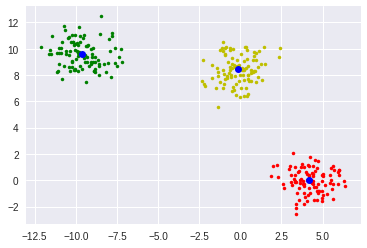

In [192]:
K.train(data)

In [3]:
from sklearn.datasets.samples_generator import make_blobs

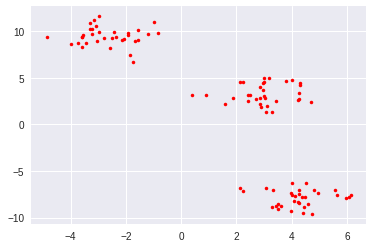

In [126]:
data,target = make_blobs(n_samples=100,centers=3)
plt.plot(data[:,0],data[:,1],'.r')

## 过程逻辑

In [86]:
avg_vector = data[np.random.randint(0,100,3)]
avg_vector

get_nearcore = lambda x:np.argmin(np.square(avg_vector - x).sum(axis=1))
new_cluster = np.apply_along_axis(get_nearcore,axis=1,arr=data)

clu_tag, new_avg = npi.group_by(new_cluster).mean(data)

np.abs(new_avg - avg_vector)

array([[ 5.44431036, -7.67480756],
       [ 0.45652531,  6.90687315],
       [-8.35406763,  4.92387282]])

In [113]:
np.abs(new_avg - avg_vector).sum()

7.2598103917821311

In [98]:
df1 = pd.DataFrame(data)

In [103]:
df1.groupby(by=new_cluster).mean()

,0,1
0,6.961073,-6.675336
1,-0.324750,6.059510
2,-7.325980,7.010722


In [ ]:
np.bincount()

In [92]:
# now sum the values of pred corresponding to each index value
sum_pred = np.bincount(idx, weights=data)

# finally, divide by the number of occurrences for each user name
mean_pred = sum_pred / counts

ValueError: object too deep for desired array